The purpose of this notebook is to prototype the design of object-oriented classes for Guaranteed Adaptive Approximation in Python (GAAPy).

Author: Sou-Cheng Choi

Date: Jun 30, 2022

# Design of Object Classes

Our initial design for GAAPy's archtecture is based on the following papers:

* Clancy, N., Ding, Y., Hamilton, C., Hickernell, F.J. and Zhang, Y., 2014. The cost of deterministic, adaptive, automatic algorithms: Cones, not balls. Journal of Complexity, 30(1), pp.21-45. 
https://www.sciencedirect.com/science/article/pii/S0885064X13000769

* Choi, S.C.T., Ding, Y., Hickernell, F.J. and Tong, X., 2017. Local adaption for approximation and minimization of univariate functions. Journal of Complexity, 40, pp.17-33.
https://www.sciencedirect.com/science/article/pii/S0885064X16301108

We will start with the one-dimensional adpative approximation algorithms from GAIL, namely, `funappx_g` and `funmin_g` , which are coded in MATLAB:

* Sou-Cheng T. Choi, Yuhan Ding, Fred J. Hickernell, Lan Jiang, Lluis Antoni Jimenez Rugama, Da Li, Jagadeeswaran Rathinavel, Xin Tong, Kan Zhang, Yizhi Zhang, and Xuan Zhou, GAIL: Guaranteed Automatic Integration Library (Version 2.3.1) [MATLAB Software], 2020. Available from http://gailgithub.github.io/GAIL_Dev/


To create UML diagrams that represent the internals of object classes, we use the tool, [PlantUML](https://plantuml.com/). To specify class relations, data members and methods, we use the text file `gaapy_uml.txt`.

In [1]:
!cat gaapy_uml.txt

@startuml
title GAAPY UML

abstract class SolutionAlgorithm
abstract class RealValuedFunction
abstract class StopCriteria
abstract class PositiveNumber

RealValuedFunction <|-- Function1D
Function1D <|-- LinearSpline1D
Function1D <|-- QuadraticSpline1D
SolutionAlgorithm <|-- Function1DApprox
Function1DApprox <|-- LinearSpline1DApprox
SolutionAlgorithm <|-- Function1DMin
Function1DMin <|-- Splines1DMin
StopCriteria <|-- AbsoluteStopCriteria
StopCriteria <|-- RelativeStopCriteria
StopCriteria <|-- GeneralizedStopCriteria
PositiveNumber <|-- PositiveInt
PositiveNumber <|-- PositiveReal


abstract class SolutionAlgorithm {
    f: RealValuedFunction
    sc: StopCriteria
    g   // output depending on SolutionAlgorithm

    g approximate()
    np.array _sample()
    np.array _error_est()
    bool _is_stop()
    _validate_inputs()
    _validate_outputs()
}

abstract class Function1DApprox {
    g: RealValuedFunction

    g approximate()
}

class LinearSpline1DApprox {
    g: LinearSpline1D
}


To generate the UML class diagrams, we could simply use the Unix command: 

In [2]:
!python -m plantuml gaapy_uml.txt

[{'filename': 'gaapy_uml.txt', 'gen_success': True}]


Alternatively, we could use the following make target defined in our project's `makefile`:b

In [3]:
!cd .. && make uml_design

make: *** No rule to make target `uml_design'.  Stop.


The output figure is in `Workouts/gaapy_uml.png`:

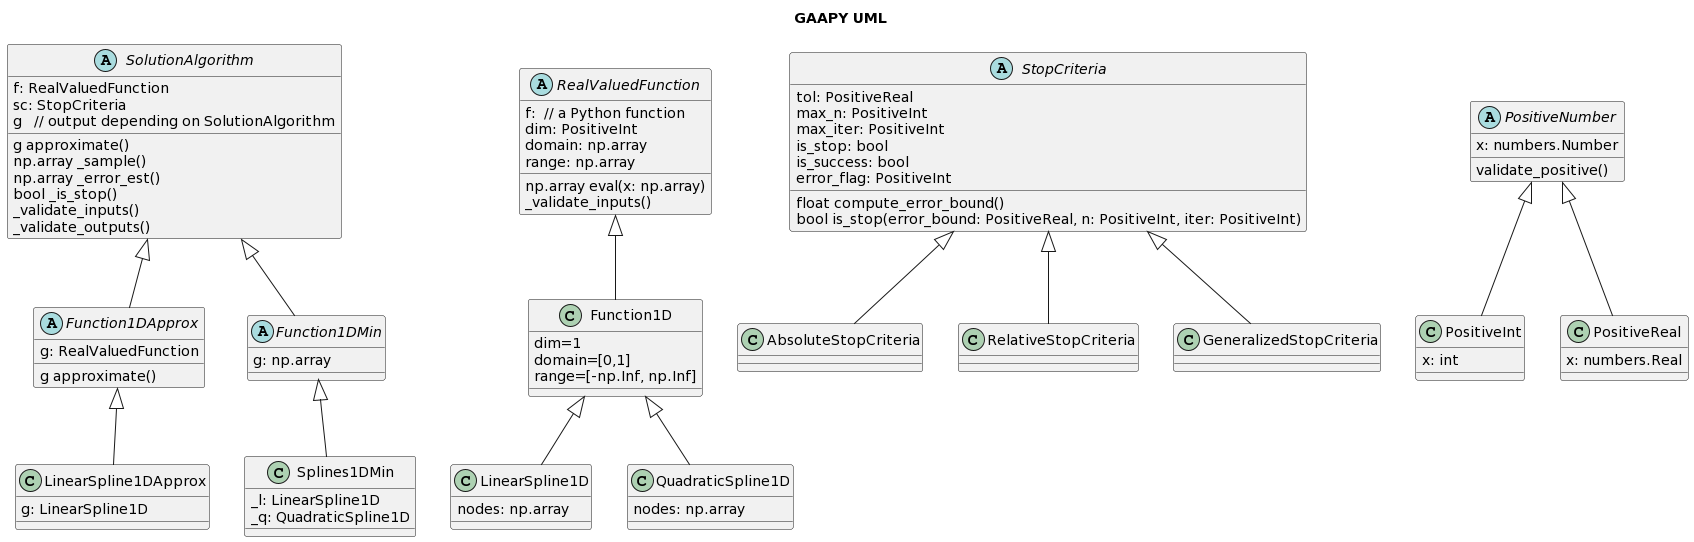

In [4]:
from IPython.display import Image
Image("gaapy_uml.png")

# Use Cases

## For function approximation:

## For function minimization: